# Pythia

## plain Pythia

In [1]:
import pandas
import numpy
import math
from copy import deepcopy

In [2]:
esmif_df = pandas.read_csv("pythia_all_train.csv").rename(str.lower, axis=1) #.drop(["Unnamed: 0"], axis=1)
esmif_df['experimental'] = True
esmif_df

,name,ddg,pythiascore,experimental
0,1a23_H_32_L,5.30,2.005835,True
1,1a23_H_32_S,5.20,-0.754283,True
2,1a23_H_32_Y,6.80,1.915074,True
3,1a43_C_71_S,-3.70,-12.047657,True
4,1a43_E_12_D,-4.55,-9.378929,True
...,...,...,...,...
3313,5pti_Y_35_A,-4.70,-10.573263,True
3314,5pti_Y_35_D,-3.80,-11.602140,True
3315,5pti_Y_35_F,-0.60,-0.648102,True
3316,5pti_Y_35_G,-5.00,-12.547439,True


In [3]:
def go_to_my_format(x):
    for _v, _k in zip(
        x["name"].split("_"), ["pdb_code", "from_aa", "position", "to_aa"]
    ):
        x[_k] = _v
    return x

In [4]:
esmif_df=esmif_df.apply(lambda x: go_to_my_format(x), axis=1)
esmif_df

,name,ddg,pythiascore,experimental,pdb_code,from_aa,position,to_aa
0,1a23_H_32_L,5.30,2.005835,True,1a23,H,32,L
1,1a23_H_32_S,5.20,-0.754283,True,1a23,H,32,S
2,1a23_H_32_Y,6.80,1.915074,True,1a23,H,32,Y
3,1a43_C_71_S,-3.70,-12.047657,True,1a43,C,71,S
4,1a43_E_12_D,-4.55,-9.378929,True,1a43,E,12,D
...,...,...,...,...,...,...,...,...
3313,5pti_Y_35_A,-4.70,-10.573263,True,5pti,Y,35,A
3314,5pti_Y_35_D,-3.80,-11.602140,True,5pti,Y,35,D
3315,5pti_Y_35_F,-0.60,-0.648102,True,5pti,Y,35,F
3316,5pti_Y_35_G,-5.00,-12.547439,True,5pti,Y,35,G


,ddg,pythiascore
ddg,1.000000,0.528188
pythiascore,0.528188,1.000000


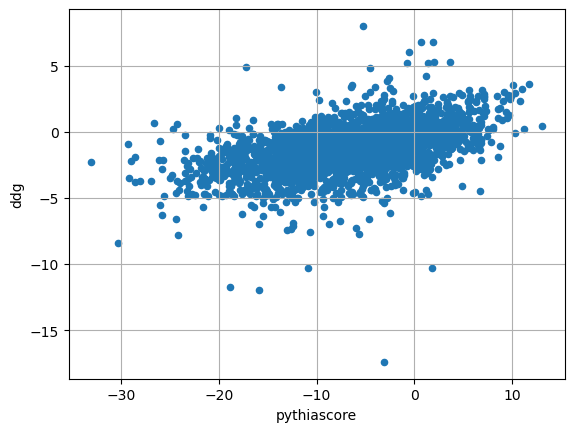

In [5]:
plain_esmif_plot= esmif_df.plot.scatter(x="pythiascore", y="ddg", grid=True)
esmif_df[["ddg", "pythiascore"]].corr()

In [6]:
zegroups=esmif_df.groupby(['pdb_code','position','from_aa']).groups
zegroups

{('1a23', '32', 'H'): [0, 1, 2], ('1a43', '12', 'E'): [4], ('1a43', '20', 'R'): [6], ('1a43', '37', 'W'): [7], ('1a43', '71', 'C'): [3], ('1a43', '9', 'G'): [5], ('1a5e', '121', 'L'): [8], ('1a5e', '15', 'W'): [10], ('1a5e', '37', 'L'): [9], ('1aar', '27', 'K'): [14], ('1aar', '29', 'K'): [15, 16], ('1aar', '42', 'R'): [19], ('1aar', '45', 'F'): [11], ('1aar', '6', 'K'): [17, 18], ('1aar', '68', 'H'): [12, 13], ('1aar', '72', 'R'): [20], ('1aep', '132', 'A'): [21], ('1aep', '136', 'T'): [23], ('1aep', '23', 'T'): [24], ('1aep', '9', 'L'): [22], ('1ag2', '52', 'F'): [26], ('1ag2', '57', 'V'): [33], ('1ag2', '6', 'M'): [28], ('1ag2', '60', 'T'): [31], ('1ag2', '67', 'T'): [32], ('1ag2', '75', 'F'): [27], ('1ag2', '77', 'E'): [25], ('1ag2', '85', 'R'): [30], ('1ag2', '87', 'V'): [34], ('1ag2', '94', 'Q'): [29], ('1aj3', '1', 'H'): [52, 53], ('1aj3', '12', 'S'): [89, 90], ('1aj3', '13', 'W'): [96], ('1aj3', '14', 'I'): [56, 57], ('1aj3', '16', 'E'): [46, 47], ('1aj3', '17', 'K'): [62], ('1

In [7]:
_=zegroups[list(zegroups.keys())[1]]
#_=zegroups[list(zegroups.values())[0]]
testgroup=esmif_df.loc[_]
_, len(_) #testgroup

(Index([4], dtype='int64'), 1)

In [8]:
def augment_single(group):
    testme = deepcopy(group)
    # if len(testme) == 1:
    #    return [dict(testme.iloc[0])]
    testme_aug = []  # pandas.DataFrame() #columns=testme.columns)
    # testme_aug
    _ddg = dict(zip(testme["to_aa"], testme["ddg"]))
    _ll = dict(zip(testme["to_aa"], testme["ll_mut"]))
    _aa = list(_ddg.keys())
    _orig_aa = testme.iloc[0]["from_aa"]
    # print(_orig_aa, _ddg, _aa, _ll)
    # dict(testme.iloc[0])

    while _aa:
        _aug_from = _aa.pop()
        for _ in _aa:
            _aug = dict(testme.iloc[0])
            _aug["from_aa"] = _aug_from
            _aug["to_aa"] = _
            _aug["ll_native"] = _ll[_aug_from]
            _aug["ll_mut"] = _ll[_]
            _aug["delta"] = _aug["ll_mut"] - _aug["ll_native"]
            _aug["ddg"] = _ddg[_] - _ddg[_aug_from]
            _aug["experimental"] = False
            testme_aug.append(_aug)
    return testme_aug

In [9]:
esmif_df

,name,ddg,pythiascore,experimental,pdb_code,from_aa,position,to_aa
0,1a23_H_32_L,5.30,2.005835,True,1a23,H,32,L
1,1a23_H_32_S,5.20,-0.754283,True,1a23,H,32,S
2,1a23_H_32_Y,6.80,1.915074,True,1a23,H,32,Y
3,1a43_C_71_S,-3.70,-12.047657,True,1a43,C,71,S
4,1a43_E_12_D,-4.55,-9.378929,True,1a43,E,12,D
...,...,...,...,...,...,...,...,...
3313,5pti_Y_35_A,-4.70,-10.573263,True,5pti,Y,35,A
3314,5pti_Y_35_D,-3.80,-11.602140,True,5pti,Y,35,D
3315,5pti_Y_35_F,-0.60,-0.648102,True,5pti,Y,35,F
3316,5pti_Y_35_G,-5.00,-12.547439,True,5pti,Y,35,G


In [10]:
def anti(x):
    #_anti = deepcopy(x)
    x['to_aa'], x['from_aa']  =  x['from_aa'], x['to_aa']
    #x['ll_mut'], x['ll_native']  =  x['ll_native'], x['ll_mut']
    x['ddg'] = -x['ddg']
    x['pythiascore'] = -x['pythiascore']
    x['experimental'] = False
    return x

anti_df = deepcopy(esmif_df).apply(anti, axis=1)

In [11]:
anti_df

,name,ddg,pythiascore,experimental,pdb_code,from_aa,position,to_aa
0,1a23_H_32_L,-5.30,-2.005835,False,1a23,L,32,H
1,1a23_H_32_S,-5.20,0.754283,False,1a23,S,32,H
2,1a23_H_32_Y,-6.80,-1.915074,False,1a23,Y,32,H
3,1a43_C_71_S,3.70,12.047657,False,1a43,S,71,C
4,1a43_E_12_D,4.55,9.378929,False,1a43,D,12,E
...,...,...,...,...,...,...,...,...
3313,5pti_Y_35_A,4.70,10.573263,False,5pti,A,35,Y
3314,5pti_Y_35_D,3.80,11.602140,False,5pti,D,35,Y
3315,5pti_Y_35_F,0.60,0.648102,False,5pti,F,35,Y
3316,5pti_Y_35_G,5.00,12.547439,False,5pti,G,35,Y


In [12]:
double_df = pandas.concat([esmif_df,anti_df],ignore_index=True)
assert len(double_df) == 2* len(esmif_df)
double_df

,name,ddg,pythiascore,experimental,pdb_code,from_aa,position,to_aa
0,1a23_H_32_L,5.30,2.005835,True,1a23,H,32,L
1,1a23_H_32_S,5.20,-0.754283,True,1a23,H,32,S
2,1a23_H_32_Y,6.80,1.915074,True,1a23,H,32,Y
3,1a43_C_71_S,-3.70,-12.047657,True,1a43,C,71,S
4,1a43_E_12_D,-4.55,-9.378929,True,1a43,E,12,D
...,...,...,...,...,...,...,...,...
6631,5pti_Y_35_A,4.70,10.573263,False,5pti,A,35,Y
6632,5pti_Y_35_D,3.80,11.602140,False,5pti,D,35,Y
6633,5pti_Y_35_F,0.60,0.648102,False,5pti,F,35,Y
6634,5pti_Y_35_G,5.00,12.547439,False,5pti,G,35,Y


,ddg,pythiascore
ddg,1.00000,0.68772
pythiascore,0.68772,1.00000


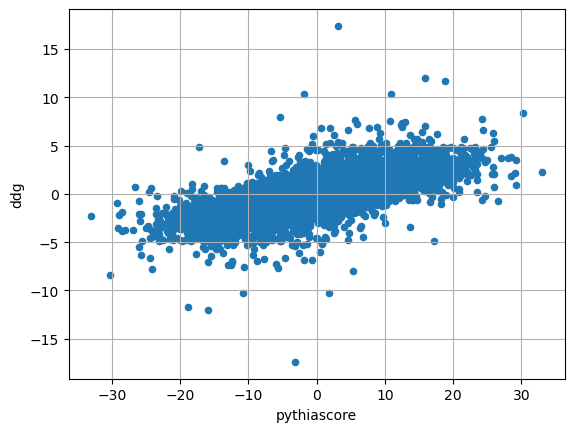

In [13]:
plain_double_plot= double_df.plot.scatter(x="pythiascore", y="ddg", grid=True)
double_df[["ddg", "pythiascore"]].corr()

## ddFEP

In [14]:
import sklearn
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error

## ddFEP w. optimized aa. DG(aq)

In [15]:
kd = {
    "A": 1.800,
    "R": -4.500,
    "N": -3.500,
    "D": -3.500,
    "C": 2.500,
    "Q": -3.500,
    "E": -3.500,
    "G": -0.400,
    "H": -3.200,
    "I": 4.500,
    "L": 3.800,
    "K": -3.900,
    "M": 1.900,
    "F": 2.800,
    "P": -1.600,
    "S": -0.800,
    "T": -0.700,
    "W": -0.900,
    "Y": -1.300,
    "V": 4.200,
}

In [16]:
ddfep_opt = deepcopy(double_df) # non singular
#ddfep_opt = deepcopy(esmif_df)
for _ in sorted(kd.keys()):
    ddfep_opt[_] = 0
ddfep_opt

,name,ddg,pythiascore,experimental,pdb_code,from_aa,position,to_aa,A,C,...,M,N,P,Q,R,S,T,V,W,Y
0,1a23_H_32_L,5.30,2.005835,True,1a23,H,32,L,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1a23_H_32_S,5.20,-0.754283,True,1a23,H,32,S,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1a23_H_32_Y,6.80,1.915074,True,1a23,H,32,Y,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1a43_C_71_S,-3.70,-12.047657,True,1a43,C,71,S,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1a43_E_12_D,-4.55,-9.378929,True,1a43,E,12,D,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6631,5pti_Y_35_A,4.70,10.573263,False,5pti,A,35,Y,0,0,...,0,0,0,0,0,0,0,0,0,0
6632,5pti_Y_35_D,3.80,11.602140,False,5pti,D,35,Y,0,0,...,0,0,0,0,0,0,0,0,0,0
6633,5pti_Y_35_F,0.60,0.648102,False,5pti,F,35,Y,0,0,...,0,0,0,0,0,0,0,0,0,0
6634,5pti_Y_35_G,5.00,12.547439,False,5pti,G,35,Y,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
def encode_mutation(x):
    x[x['from_aa']]= -1
    x[x['to_aa']] = 1
    return x

In [18]:
ddfep_opt = ddfep_opt.apply(encode_mutation, axis='columns')
ddfep_opt

,name,ddg,pythiascore,experimental,pdb_code,from_aa,position,to_aa,A,C,...,M,N,P,Q,R,S,T,V,W,Y
0,1a23_H_32_L,5.30,2.005835,True,1a23,H,32,L,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1a23_H_32_S,5.20,-0.754283,True,1a23,H,32,S,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1a23_H_32_Y,6.80,1.915074,True,1a23,H,32,Y,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1a43_C_71_S,-3.70,-12.047657,True,1a43,C,71,S,0,-1,...,0,0,0,0,0,1,0,0,0,0
4,1a43_E_12_D,-4.55,-9.378929,True,1a43,E,12,D,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6631,5pti_Y_35_A,4.70,10.573263,False,5pti,A,35,Y,-1,0,...,0,0,0,0,0,0,0,0,0,1
6632,5pti_Y_35_D,3.80,11.602140,False,5pti,D,35,Y,0,0,...,0,0,0,0,0,0,0,0,0,1
6633,5pti_Y_35_F,0.60,0.648102,False,5pti,F,35,Y,0,0,...,0,0,0,0,0,0,0,0,0,1
6634,5pti_Y_35_G,5.00,12.547439,False,5pti,G,35,Y,0,0,...,0,0,0,0,0,0,0,0,0,1


### AA only fit

In [19]:
X_optfep= ddfep_opt[sorted(kd.keys())].to_numpy()
y = ddfep_opt["ddg"].to_numpy()
X_optfep.shape, y.shape

((6636, 20), (6636,))

In [20]:
beta_pinv = numpy.dot(numpy.linalg.pinv(X_optfep), y)
beta_pinv

array([-0.83235125, -0.19543102, -0.58366424, -0.02095038,  0.41118293,
       -1.14499004, -0.37206875,  1.15822059, -0.31200837,  0.93325317,
        0.44585773, -0.35784342, -0.36605156, -0.50164647,  0.39288786,
       -0.86822042, -0.20380793,  0.53157419,  0.92184309,  0.96421428])

In [21]:
betas= dict(zip(sorted(kd.keys()),beta_pinv))
betas

{'A': -0.8323512500992392,
 'C': -0.19543102186455177,
 'D': -0.5836642382938794,
 'E': -0.020950377443508417,
 'F': 0.41118292716855237,
 'G': -1.1449900404684912,
 'H': -0.37206874549975827,
 'I': 1.1582205911419035,
 'K': -0.31200837489743183,
 'L': 0.9332531673989894,
 'M': 0.44585772924784095,
 'N': -0.3578434244436367,
 'P': -0.3660515550778742,
 'Q': -0.5016464651052177,
 'R': 0.39288785934441794,
 'S': -0.8682204189571707,
 'T': -0.20380792685875532,
 'V': 0.5315741927779087,
 'W': 0.9218430938852544,
 'Y': 0.9642142780446442}

In [22]:
#ddfep_opt['ddfep_opt']=dd_optfep_model.predict(X_optfep)
ddfep_opt['ddfep_opt']=numpy.dot(X_optfep,beta_pinv)
ddfep_opt

,name,ddg,pythiascore,experimental,pdb_code,from_aa,position,to_aa,A,C,...,N,P,Q,R,S,T,V,W,Y,ddfep_opt
0,1a23_H_32_L,5.30,2.005835,True,1a23,H,32,L,0,0,...,0,0,0,0,0,0,0,0,0,1.305322
1,1a23_H_32_S,5.20,-0.754283,True,1a23,H,32,S,0,0,...,0,0,0,0,1,0,0,0,0,-0.496152
2,1a23_H_32_Y,6.80,1.915074,True,1a23,H,32,Y,0,0,...,0,0,0,0,0,0,0,0,1,1.336283
3,1a43_C_71_S,-3.70,-12.047657,True,1a43,C,71,S,0,-1,...,0,0,0,0,1,0,0,0,0,-0.672789
4,1a43_E_12_D,-4.55,-9.378929,True,1a43,E,12,D,0,0,...,0,0,0,0,0,0,0,0,0,-0.562714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6631,5pti_Y_35_A,4.70,10.573263,False,5pti,A,35,Y,-1,0,...,0,0,0,0,0,0,0,0,1,1.796566
6632,5pti_Y_35_D,3.80,11.602140,False,5pti,D,35,Y,0,0,...,0,0,0,0,0,0,0,0,1,1.547879
6633,5pti_Y_35_F,0.60,0.648102,False,5pti,F,35,Y,0,0,...,0,0,0,0,0,0,0,0,1,0.553031
6634,5pti_Y_35_G,5.00,12.547439,False,5pti,G,35,Y,0,0,...,0,0,0,0,0,0,0,0,1,2.109204


1.732024001608175

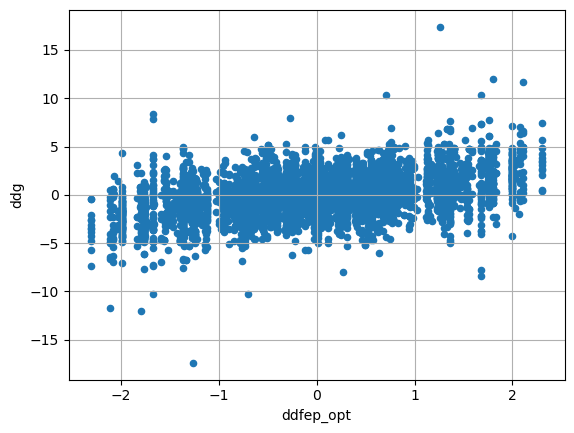

In [23]:
ddfep_opt_plot = ddfep_opt.plot.scatter(x='ddfep_opt',y='ddg', grid=True)
math.sqrt(mean_squared_error(ddfep_opt['ddg'],ddfep_opt['ddfep_opt']))

In [24]:
ddfep_opt[['ddg','ddfep_opt']].corr()

,ddg,ddfep_opt
ddg,1.000000,0.482872
ddfep_opt,0.482872,1.000000


### Ridge test

In [25]:
dd_optfep_model = Ridge(fit_intercept=False).fit(
    X_optfep,
    y,
)

In [26]:
dd_optfep_model.coef_, dd_optfep_model.intercept_, math.sqrt(dd_optfep_model.score(X_optfep, y))

(array([-0.83189038, -0.19450631, -0.5820254 , -0.02033239,  0.40928873,
        -1.14350249, -0.37068   ,  1.15641996, -0.31106916,  0.931752  ,
         0.44375374, -0.3561338 , -0.36320085, -0.49984721,  0.39245942,
        -0.86634004, -0.2033465 ,  0.53093716,  0.91678151,  0.96148201]),
 0.0,
 0.4828711903849796)

In [27]:
ddfep_opt['Ridge']=dd_optfep_model.predict(X_optfep)

In [28]:
#ddfep_opt[["name", "ddg", "pythiascore", "ddfep_opt"]].rename(
#    {"ddfep_opt": "pythia_ddmbc"}, axis=1).to_csv("pythia_ddmbc_train.csv")

1.7320249268006231

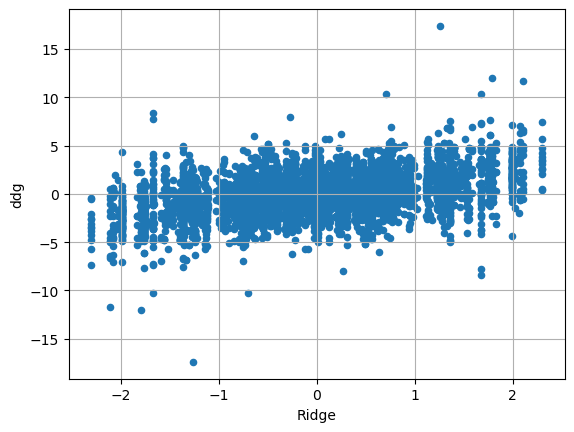

In [29]:
ddfep_opt_plot = ddfep_opt.plot.scatter(x='Ridge',y='ddg', grid=True)
math.sqrt(mean_squared_error(ddfep_opt['ddg'],ddfep_opt['Ridge']))

In [30]:
ddfep_opt[['ddg','ddfep_opt', 'Ridge']].corr()

,ddg,ddfep_opt,Ridge
ddg,1.000000,0.482872,0.482872
ddfep_opt,0.482872,1.000000,0.999999
Ridge,0.482872,0.999999,1.000000


In [31]:
pandas.DataFrame(
    {
        "KD": kd,
        "PINV": betas,
        "Ridge": dict(zip(sorted(kd.keys()), dd_optfep_model.coef_)),
    }
)

,KD,PINV,Ridge
A,1.8,-0.832351,-0.831890
R,-4.5,0.392888,0.392459
N,-3.5,-0.357843,-0.356134
D,-3.5,-0.583664,-0.582025
C,2.5,-0.195431,-0.194506
Q,-3.5,-0.501646,-0.499847
E,-3.5,-0.020950,-0.020332
G,-0.4,-1.144990,-1.143502
H,-3.2,-0.372069,-0.370680
I,4.5,1.158221,1.156420


### Crossvalidate (Ridge regression)

In [32]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold

In [33]:
optfep_rsq=cross_val_score(Ridge(fit_intercept=False),
                   X_optfep,y,
                   cv=RepeatedStratifiedKFold(n_splits=5,
                                              n_repeats=10,
                                              #shuffle=True,
                                             ).split(X_optfep, y > 0))
optfep_rsq

array([0.21627103, 0.20135661, 0.25140724, 0.25230007, 0.21822125,
       0.26193288, 0.22148194, 0.18710112, 0.24295212, 0.21656798,
       0.20868162, 0.22910286, 0.2490993 , 0.23896824, 0.21768551,
       0.18612011, 0.22301295, 0.24642665, 0.24348829, 0.23792453,
       0.21633992, 0.24919552, 0.22049797, 0.26416923, 0.19230827,
       0.19857947, 0.23159355, 0.21775776, 0.23520496, 0.25542723,
       0.25779136, 0.25061002, 0.20970279, 0.20933081, 0.20709454,
       0.21532111, 0.21624775, 0.20828452, 0.22821965, 0.26858491,
       0.24300368, 0.24664915, 0.23786245, 0.24456729, 0.17334221,
       0.23319406, 0.21655398, 0.24145906, 0.26068419, 0.19419746])

In [34]:
numpy.sqrt(optfep_rsq).mean(), numpy.sqrt(optfep_rsq).std()

(0.4767752701264626, 0.02372520266756497)

In [35]:
sum([math.sqrt(_) for _ in optfep_rsq])/len(optfep_rsq)


0.47677527012646254

In [36]:
#numpy.sqrt(optfep_rsq).mean(), numpy.sqrt(optfep_rsq).std()

In [37]:
#sum([math.sqrt(_) for _ in optfep_rsq])/len(optfep_rsq)


## Test on S669

In [38]:
esmif_s669_df = (
    pandas.read_csv("pythia_s669_augd.csv", index_col=None)
    .rename(str.lower, axis=1)
    .apply(lambda x: go_to_my_format(x), axis=1)
)
#esmif_s669_df['experimental']=True
esmif_s669_df

,name,ddg,pythiascore,pdb_code,from_aa,position,to_aa
0,1a0f_S_11_A,-1.800,-2.911759,1a0f,S,11,A
1,1a7v_A_104_H,-2.690,-8.782735,1a7v,A,104,H
2,1a7v_K_13_H,-0.600,-4.157711,1a7v,K,13,H
3,1a7v_K_20_H,-2.880,-8.267227,1a7v,K,20,H
4,1a7v_D_3_H,-1.360,-12.814983,1a7v,D,3,H
...,...,...,...,...,...,...,...
664,5jxb_D_25_P,-1.440,-5.337091,5jxb,D,25,P
665,5oaq_Y_199_H,-2.990,-13.397189,5oaq,Y,199,H
666,5vp3_S_128_G,-0.378,-8.731921,5vp3,S,128,G
667,5vp3_V_183_T,0.354,-3.005847,5vp3,V,183,T


In [39]:
s669_in=pandas.read_csv('s669_pythia_in.csv').drop(['Unnamed: 0'], axis=1)
s669_in

,pdb,mut_format,ddg,chain,wildtype,resseq,mutation
0,1a0f,SA11A,-1.800,A,S,11,A
1,1a7v,AA104H,-2.690,A,A,104,H
2,1a7v,KA13H,-0.600,A,K,13,H
3,1a7v,KA20H,-2.880,A,K,20,H
4,1a7v,DA3H,-1.360,A,D,3,H
...,...,...,...,...,...,...,...
664,5jxb,DA329P,-1.440,A,D,329,P
665,5oaq,YA429H,-2.990,A,Y,429,H
666,5vp3,SA128G,-0.378,A,S,128,G
667,5vp3,VA183T,0.354,A,V,183,T


In [40]:
esmif_s669_df['chain']=s669_in['chain']

In [41]:
esmif_s669_rev_df = deepcopy(esmif_s669_df).apply(anti, axis=1)
esmif_s669_df['experimental']=True
esmif_s669_rev_df['experimental']=False
esmif_s669_df.shape, esmif_s669_rev_df.shape

((669, 9), (669, 9))

In [42]:
esmif_s669_sym_df= pandas.concat([ esmif_s669_df, esmif_s669_rev_df], ignore_index=True)
esmif_s669_sym_df

,name,ddg,pythiascore,pdb_code,from_aa,position,to_aa,chain,experimental
0,1a0f_S_11_A,-1.800,-2.911759,1a0f,S,11,A,A,True
1,1a7v_A_104_H,-2.690,-8.782735,1a7v,A,104,H,A,True
2,1a7v_K_13_H,-0.600,-4.157711,1a7v,K,13,H,A,True
3,1a7v_K_20_H,-2.880,-8.267227,1a7v,K,20,H,A,True
4,1a7v_D_3_H,-1.360,-12.814983,1a7v,D,3,H,A,True
...,...,...,...,...,...,...,...,...,...
1333,5jxb_D_25_P,1.440,5.337091,5jxb,P,25,D,A,False
1334,5oaq_Y_199_H,2.990,13.397189,5oaq,H,199,Y,A,False
1335,5vp3_S_128_G,0.378,8.731921,5vp3,G,128,S,A,False
1336,5vp3_V_183_T,-0.354,3.005847,5vp3,T,183,V,A,False


In [43]:
for _ in sorted(kd.keys()):
    esmif_s669_sym_df[_] = 0
esmif_s669_sym_df= esmif_s669_sym_df.apply(encode_mutation, axis='columns')
esmif_s669_sym_df

,name,ddg,pythiascore,pdb_code,from_aa,position,to_aa,chain,experimental,A,...,M,N,P,Q,R,S,T,V,W,Y
0,1a0f_S_11_A,-1.800,-2.911759,1a0f,S,11,A,A,True,1,...,0,0,0,0,0,-1,0,0,0,0
1,1a7v_A_104_H,-2.690,-8.782735,1a7v,A,104,H,A,True,-1,...,0,0,0,0,0,0,0,0,0,0
2,1a7v_K_13_H,-0.600,-4.157711,1a7v,K,13,H,A,True,0,...,0,0,0,0,0,0,0,0,0,0
3,1a7v_K_20_H,-2.880,-8.267227,1a7v,K,20,H,A,True,0,...,0,0,0,0,0,0,0,0,0,0
4,1a7v_D_3_H,-1.360,-12.814983,1a7v,D,3,H,A,True,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,5jxb_D_25_P,1.440,5.337091,5jxb,P,25,D,A,False,0,...,0,0,-1,0,0,0,0,0,0,0
1334,5oaq_Y_199_H,2.990,13.397189,5oaq,H,199,Y,A,False,0,...,0,0,0,0,0,0,0,0,0,1
1335,5vp3_S_128_G,0.378,8.731921,5vp3,G,128,S,A,False,0,...,0,0,0,0,0,1,0,0,0,0
1336,5vp3_V_183_T,-0.354,3.005847,5vp3,T,183,V,A,False,0,...,0,0,0,0,0,0,-1,1,0,0


In [44]:
X_s669=esmif_s669_sym_df[sorted(kd.keys())].to_numpy()
#y_s669_af=esmif_af_df['ddg'].to_numpy()

In [45]:
esmif_s669_sym_df['ddfep_opt']=dd_optfep_model.predict(X_s669)
#esmif_s669_sym_df['ddfep_opt']=numpy.dot(X_s669,beta_pinv)

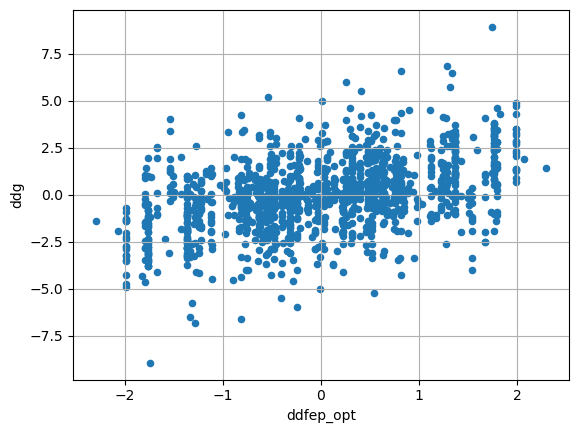

In [46]:
esmif_s669_sym_plot = esmif_s669_sym_df.plot.scatter(x='ddfep_opt',y='ddg', grid=True)

#math.sqrt(dd_optfep_model.score(X_s669, y_s669))

In [47]:
#esmif_s669_sym_df.rename({"ddfep_opt": "pythia_ddmbc"}, axis=1).to_csv('pythia_test_pdb.csv')

In [48]:
math.sqrt(mean_squared_error(esmif_s669_sym_df['ddg'],esmif_s669_sym_df['ddfep_opt']))

1.6783470834145275

In [49]:
esmif_s669_sym_df[['ddg','ddfep_opt','pythiascore']].corr()

,ddg,ddfep_opt,pythiascore
ddg,1.000000,0.468082,0.561723
ddfep_opt,0.468082,1.000000,0.351499
pythiascore,0.561723,0.351499,1.000000


### experimental only

,ddg,ddfep_opt
ddg,1.00000,0.31724
ddfep_opt,0.31724,1.00000


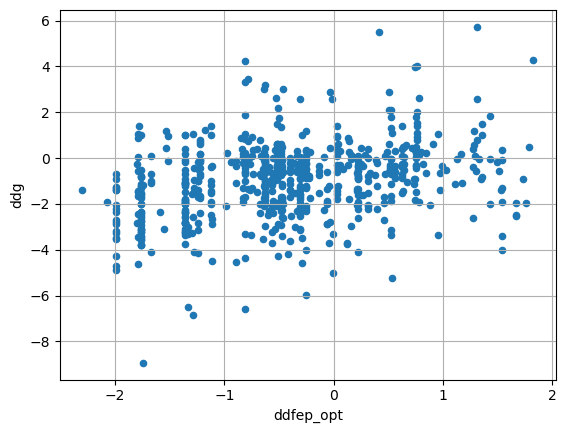

In [50]:
# parts
exp_filter=(esmif_s669_sym_df['experimental'] == True)
rev_filter=(esmif_s669_sym_df['experimental'] == False)
esmif_s669_exp_plot = esmif_s669_sym_df[exp_filter].plot.scatter(x='ddfep_opt',y='ddg', grid=True)
display(esmif_s669_sym_df[exp_filter][['ddg','ddfep_opt']].corr())
#display(esmif_s669_sym_df[(rev_filter)][['ddg','ddfep_opt']].corr


In [51]:
_ef=esmif_s669_sym_df[exp_filter][['ddg','ddfep_opt']]
math.sqrt(mean_squared_error(_ef['ddg'],_ef['ddfep_opt']))

1.6783470834145275

In [52]:
# only esmi-if
esmif_s669_df[['ddg','pythiascore']].corr()

,ddg,pythiascore
ddg,1.000000,0.362811
pythiascore,0.362811,1.000000


## S461 

In [53]:
#esmif_s669_sym_df[esmif_s669_sym_df['s461']==True][['ddg','ddfep_opt','pythiascore']].corr()

In [54]:
s461_df=pandas.read_csv('S461.mut',sep=' ')

In [55]:
## extract mutations to simpler csv
s461_mutations = pandas.DataFrame(s461_df['ddg'])
s461_mutations['pdb_code'] = s461_df['pdb'].apply(lambda x: x[:4].lower())
s461_mutations['chain'] = s461_df['pdb'].apply(lambda x: x[-1].upper())
s461_mutations['position'] = s461_df['mut'].apply(lambda x: int(x[1:-1]))
s461_mutations['from_aa'] = s461_df['mut'].apply(lambda x: x[0].upper())
s461_mutations['to_aa'] = s461_df['mut'].apply(lambda x: x[-1].upper())
s461_mutations['name']= s461_mutations.apply(lambda x: '_'.join([ x['pdb_code'],
                                                          x['from_aa'],
                                                          str(x['position']),
                                                          x['to_aa'],
                                                         ]), axis=1)
s461_mutations

,ddg,pdb_code,chain,position,from_aa,to_aa,name
0,-1.800,1a0f,A,11,S,A,1a0f_S_11_A
1,-1.745,1ba3,A,461,H,D,1ba3_H_461_D
2,0.287,1ba3,A,489,H,D,1ba3_H_489_D
3,-0.287,1ba3,A,489,H,K,1ba3_H_489_K
4,-0.263,1ba3,A,489,H,M,1ba3_H_489_M
...,...,...,...,...,...,...,...
456,0.060,4he7,A,19,A,G,4he7_A_19_G
457,-0.460,4he7,A,19,A,K,4he7_A_19_K
458,-1.440,5jxb,A,329,D,G,5jxb_D_329_G
459,-1.440,5jxb,A,329,D,P,5jxb_D_329_P


In [56]:
esmif_s669_sym_df['s461']=esmif_s669_sym_df.apply(lambda x: x['pdb_code'] in list(s461_mutations['pdb_code']), axis=1)

In [57]:
#esmif_s669_sym_df['s461']=esmif_s669_sym_df.apply(lambda x: mut_hash(x) in s461_hashes,axis=1)
esmif_s461_df= esmif_s669_sym_df[esmif_s669_sym_df['s461'] == True]
display(esmif_s461_df[['ddg','ddfep_opt','pythiascore']].corr())

,ddg,ddfep_opt,pythiascore
ddg,1.000000,0.594492,0.669590
ddfep_opt,0.594492,1.000000,0.411846
pythiascore,0.669590,0.411846,1.000000


##### Spearman

In [58]:
display(esmif_s461_df[['ddg','ddfep_opt','pythiascore']].corr(method='spearman'))

,ddg,ddfep_opt,pythiascore
ddg,1.000000,0.574849,0.691167
ddfep_opt,0.574849,1.000000,0.378043
pythiascore,0.691167,0.378043,1.000000


### experimental

/tmp/ipykernel_1032784/1671931439.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  esmif_s461_plot = esmif_s461_df[exp_filter].plot.scatter(x='ddfep_opt',y='ddg', grid=True)
/tmp/ipykernel_1032784/1671931439.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  display(esmif_s461_df[exp_filter][['ddg','ddfep_opt','pythiascore']].corr())


,ddg,ddfep_opt,pythiascore
ddg,1.000000,0.384979,0.425031
ddfep_opt,0.384979,1.000000,0.118743
pythiascore,0.425031,0.118743,1.000000


/tmp/ipykernel_1032784/1671931439.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  math.sqrt(mean_squared_error(esmif_s461_df[exp_filter]['ddg'],esmif_s461_df[exp_filter]['ddfep_opt']))
/tmp/ipykernel_1032784/1671931439.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  math.sqrt(mean_squared_error(esmif_s461_df[exp_filter]['ddg'],esmif_s461_df[exp_filter]['ddfep_opt']))


1.3672569926309974

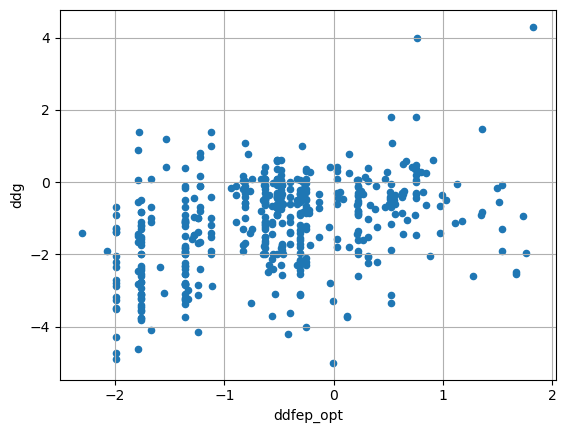

In [59]:
esmif_s461_plot = esmif_s461_df[exp_filter].plot.scatter(x='ddfep_opt',y='ddg', grid=True)
display(esmif_s461_df[exp_filter][['ddg','ddfep_opt','pythiascore']].corr())
math.sqrt(mean_squared_error(esmif_s461_df[exp_filter]['ddg'],esmif_s461_df[exp_filter]['ddfep_opt']))

##### Spearman

In [60]:
display(esmif_s461_df[exp_filter][['ddg','ddfep_opt','pythiascore']].corr(method='spearman'))

/tmp/ipykernel_1032784/2370459061.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  display(esmif_s461_df[exp_filter][['ddg','ddfep_opt','pythiascore']].corr(method='spearman'))


,ddg,ddfep_opt,pythiascore
ddg,1.000000,0.363220,0.422945
ddfep_opt,0.363220,1.000000,0.088881
pythiascore,0.422945,0.088881,1.000000


### Augmented

### Training

In [61]:
from sklearn.metrics import classification_report

In [62]:
def stabilization_class(x):
    if x > 1.0:
        return 1
    if x < -1.0:
        return -1
    return 0

states3_df=ddfep_opt[['ddg','ddfep_opt']]
states3_df.map(stabilization_class).corr()

,ddg,ddfep_opt
ddg,1.000000,0.398896
ddfep_opt,0.398896,1.000000


In [63]:
print(classification_report(states3_df['ddg'].map(stabilization_class),
                      states3_df['ddfep_opt'].map(stabilization_class)))

              precision    recall  f1-score   support

          -1       0.62      0.35      0.44      1713
           0       0.56      0.82      0.67      3210
           1       0.62      0.35      0.44      1713

    accuracy                           0.58      6636
   macro avg       0.60      0.51      0.52      6636
weighted avg       0.59      0.58      0.55      6636



### S669

#### experimental

In [64]:
esmif_s669_sym_df[exp_filter][['ddg','ddfep_opt']].map(stabilization_class).corr()

,ddg,ddfep_opt
ddg,1.000000,0.268743
ddfep_opt,0.268743,1.000000


In [65]:
print(classification_report(esmif_s669_sym_df[exp_filter]['ddg'].map(stabilization_class),
                      esmif_s669_sym_df[exp_filter]['ddfep_opt'].map(stabilization_class)))

              precision    recall  f1-score   support

          -1       0.70      0.41      0.52       302
           0       0.56      0.79      0.65       320
           1       0.15      0.13      0.14        47

    accuracy                           0.57       669
   macro avg       0.47      0.44      0.44       669
weighted avg       0.59      0.57      0.56       669



### S461

#### experimental

In [66]:
esmif_s461_df[exp_filter][['ddg','ddfep_opt']].map(stabilization_class).corr()

/tmp/ipykernel_1032784/3168268903.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  esmif_s461_df[exp_filter][['ddg','ddfep_opt']].map(stabilization_class).corr()


,ddg,ddfep_opt
ddg,1.000000,0.324087
ddfep_opt,0.324087,1.000000


In [67]:
print(classification_report(esmif_s461_df[exp_filter]['ddg'].map(stabilization_class),
                      esmif_s461_df[exp_filter]['ddfep_opt'].map(stabilization_class)))

              precision    recall  f1-score   support

          -1       0.76      0.49      0.60       222
           0       0.64      0.83      0.72       234
           1       0.11      0.20      0.14        10

    accuracy                           0.65       466
   macro avg       0.50      0.51      0.49       466
weighted avg       0.68      0.65      0.65       466



/tmp/ipykernel_1032784/3018456667.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(classification_report(esmif_s461_df[exp_filter]['ddg'].map(stabilization_class),
/tmp/ipykernel_1032784/3018456667.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  esmif_s461_df[exp_filter]['ddfep_opt'].map(stabilization_class)))


#### augmented

In [68]:
esmif_s461_df[['ddg','ddfep_opt']].map(stabilization_class).corr()

,ddg,ddfep_opt
ddg,1.00000,0.51582
ddfep_opt,0.51582,1.00000


In [69]:
print(classification_report(esmif_s461_df['ddg'].map(stabilization_class),
                      esmif_s461_df['ddfep_opt'].map(stabilization_class)))

              precision    recall  f1-score   support

          -1       0.69      0.48      0.56       232
           0       0.64      0.83      0.72       468
           1       0.69      0.48      0.56       232

    accuracy                           0.65       932
   macro avg       0.67      0.60      0.62       932
weighted avg       0.66      0.65      0.64       932

